# 회귀분석 과제
22 July 2021(Thu)

---

제출 형식: 본인 Github에 다음과 같은 파일명으로 두 개의 파일을 업로드하시면 됩니다.  
- 19기_학과명_이름.ipynb  
- graduate_submission.csv

# 목표: 대학원 합격 확률 및 합격 여부 예측

- 회귀: 학습 데이터로 선형 회귀, Ridge, Lasso를 통해 학습시켜 봅시다.

완성된 모델로 테스트 데이터의 **합격 여부**를 예측해보세요. (합격 여부를 예측하는 것은 분류 문제입니다.)  
아래의 빈칸(코드+서술 답안)을 모두 채워 넣어주시면 됩니다.  
"## TODO"라고 적힌 부분에는 코드를 작성하여 주시고, "A."라고 적힌 부분에는 서술 답안을 작성하여 주세요.  
이를 모두 완성한 **(1) ipynb 파일**과 최종 예측을  **(2) csv 파일**로 저장하여 본인 Github에 업로드하시면 됩니다.

In [243]:
# 패키지 불러오기
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [244]:
# 경고 무시
import warnings
warnings.filterwarnings(action='ignore')

# 데이터 로드 및 확인
graduate_train.csv 파일과 graduate_test.csv 파일을 My Drive에 넣어주세요.  
(Jupyter Notebook을 사용하시는 경우에는 graduate_train.csv 파일과 graduate_test.csv 파일 경로를 각각의 로컬 디렉토리 위치로 변경해주세요.)

In [245]:
# train 데이터 불러오기
df = pd.read_csv("graduate_train.csv")

# train 데이터 크기 확인
print("data size:", df.shape)

# train 데이터 훑어보기
df.head(10)

data size: (400, 8)


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,310,105,2,3.0,3.5,8.01,No,0.71
1,307,105,2,2.5,4.5,8.12,Yes,0.67
2,329,111,4,4.5,4.0,9.01,Yes,0.81
3,300,105,1,1.0,2.0,7.80,No,0.58
4,329,114,5,4.0,5.0,9.30,Yes,0.86
5,300,104,3,3.5,3.0,8.16,No,0.71
6,318,103,3,4.0,4.5,8.49,Yes,0.71
7,322,110,4,4.0,5.0,9.13,Yes,0.86
8,315,105,2,2.0,2.5,7.65,No,0.39
9,332,119,4,5.0,4.5,9.24,Yes,0.90


In [246]:
# test 데이터 불러오기
test = pd.read_csv("graduate_test.csv")

# test 데이터 크기 확인
print("data size:", test.shape)

# test 데이터 훑어보기
test.head(10)

# test 데이터에는 'Chance of Admit'이 없습니다. 이 확률을 예측해보는 것이 과제입니다.

data size: (100, 7)


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,304,103,5,5.0,4.0,8.64,No
1,297,96,2,2.5,1.5,7.89,No
2,302,101,2,2.5,3.5,7.96,No
3,318,112,3,4.0,3.5,8.67,No
4,304,100,4,1.5,2.5,7.84,No
5,330,116,4,5.0,4.5,9.45,Yes
6,315,110,2,3.5,3.0,8.46,Yes
7,317,107,3,4.0,3.0,8.70,No
8,330,114,3,4.5,4.5,9.24,Yes
9,323,111,5,4.0,5.0,9.86,Yes


# 1. 결측치

데이터에 결측치가 있는지 확인해보세요.

In [247]:
## TODO
print("df결측치 비율 :\n",df.isnull().sum()/df.shape[0]*100)
print("test결측치 비율 :\n",test.isnull().sum()/test.shape[0]*100)

df결측치 비율 :
 GRE Score            0.0
TOEFL Score          0.0
University Rating    0.0
SOP                  0.0
LOR                  0.0
CGPA                 0.0
Research             0.0
Chance of Admit      0.0
dtype: float64
test결측치 비율 :
 GRE Score            0.0
TOEFL Score          0.0
University Rating    0.0
SOP                  0.0
LOR                  0.0
CGPA                 0.0
Research             0.0
dtype: float64


Q. 데이터에 결측치가 있나요? 어떤 방법으로 처리하였나요?  
A. 데이터에 결측치가 존재하지 않는다.

# 2. 범주형 변수

설명변수 중 범주형 변수가 존재하나요?  
존재한다면 어떻게 처리해주어야 할까요?  
**학습 데이터를 수정하는 경우 테스트 데이터도 그에 맞게 수정해주어야 된다는 점에 유의하세요.**

In [253]:
## TODO
display(df.dtypes)
df_dum=pd.get_dummies(df)
test_dum=pd.get_dummies(test)
display(df_dum)
display(test_dum)

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research              object
Chance of Admit      float64
dtype: object

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit,Research_No,Research_Yes
0,310,105,2,3.0,3.5,8.01,0.71,1,0
1,307,105,2,2.5,4.5,8.12,0.67,0,1
2,329,111,4,4.5,4.0,9.01,0.81,0,1
3,300,105,1,1.0,2.0,7.80,0.58,1,0
4,329,114,5,4.0,5.0,9.30,0.86,0,1
...,...,...,...,...,...,...,...,...,...
395,316,110,3,3.5,4.0,8.56,0.75,1,0
396,302,110,3,4.0,4.5,8.50,0.65,1,0
397,312,107,4,4.5,4.0,8.65,0.73,0,1
398,298,99,1,1.5,3.0,7.46,0.53,1,0


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research_No,Research_Yes
0,304,103,5,5.0,4.0,8.64,1,0
1,297,96,2,2.5,1.5,7.89,1,0
2,302,101,2,2.5,3.5,7.96,1,0
3,318,112,3,4.0,3.5,8.67,1,0
4,304,100,4,1.5,2.5,7.84,1,0
...,...,...,...,...,...,...,...,...
95,312,107,3,3.0,2.0,7.90,0,1
96,313,94,2,2.5,1.5,8.13,1,0
97,313,109,3,4.0,3.5,9.00,1,0
98,316,104,3,3.0,3.5,8.00,0,1


Q. 어떤 변수가 범주형인가요? 어떻게 처리해 주었나요?  
A. 'Resarch'가 범주형 변수여서, pandas의 get_dummis 를 통해 수치형 데이터로 변환하였다.

# 3. 선형(Linear) 회귀

In [254]:
# 먼저 데이터를 설명변수와 종속변수로 분리합니다.
X = df_dum.drop('Chance of Admit', axis=1)
y = df_dum['Chance of Admit']

In [255]:
# 데이터를 train과 test로 분리하여 사용합니다.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [256]:
# 각각의 크기 확인
print("training predictors size:", X_train.shape)
print("training response size:", y_train.shape)
print("test predictors size:", X_test.shape)
print("test response size:", y_test.shape)

training predictors size: (320, 8)
training response size: (320,)
test predictors size: (80, 8)
test response size: (80,)


### 3.1. scikit-learn으로 선형 회귀

In [257]:
from sklearn.linear_model import LinearRegression

In [258]:
# 1. 먼저 모델을 만들어 줍니다.
## TODO
linear = LinearRegression()
# 2. 모델을 적합시킵니다.
## TODO
linear.fit(X_train, y_train)
# 3. train 세트와 test 세트에서의 성능을 확인합니다. (이 경우 결정계수 R^2)
## TODO
print("R^2 score:", np.round(linear.score(X_train, y_train), 3))

R^2 score: 0.826


#### 3.1.1. 모델의 MSE와 R^2를 구해봅시다.

In [259]:
from sklearn.metrics import mean_squared_error, r2_score

In [260]:
# 4. X_test로 y_pred를 만들어줍니다.
## TODO
y_pred = linear.predict(X_test)
print('MSE: %.4f' % mean_squared_error(y_test, y_pred))
print('Variance score: %.4f' % r2_score(y_test, y_pred))

MSE: 0.0040
Variance score: 0.7729


#### 3.1.2. 모델의 절편 계수를 확인해봅시다.

In [261]:
## TODO
linear.intercept_

-1.2419421437018667

Q. 절편 계수의 의미는 무엇인가요?  
A. 모든 독립변수의 값이 0일때의 대학원 합격확률(종속변수)값.

#### 3.1.3. 모델의 기울기 계수를 확인해 보세요.

In [262]:
coef = pd.DataFrame(linear.coef_, X.columns, ['Coefficients'])
display(coef.sort_values(['Coefficients']))

,Coefficients
Research_No,-0.013241
GRE Score,0.001640
University Rating,0.002748
TOEFL Score,0.003606
SOP,0.007253
Research_Yes,0.013241
LOR,0.017343
CGPA,0.112079


In [263]:
## TODO
import statsmodels.api as sm

model = sm.OLS(y_train, X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance of Admit   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     211.6
Date:                Wed, 28 Jul 2021   Prob (F-statistic):          1.99e-114
Time:                        02:41:15   Log-Likelihood:                 449.18
No. Observations:                 320   AIC:                            -882.4
Df Residuals:                     312   BIC:                            -852.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
GRE Score             0.0016      0.001      2.571      0.011       0.000       0.003
TOEFL Score           0.0036      0.001      3.161      0.002       0.001       0.006
University Rating     0.0027      0.005      0.582      0.561      -0.007       0.012
SOP                   0.0073      0.006      1.273      0.204      -0.004       0.018
LOR                   0.0173      0.005      3.391      0.001       0.007       0.027
CGPA                  0.1121      0.012      9.237      0.000       0.088       0.136
Research_No          -1.2552      0.132     -9.498      0.000      -1.515      -0.995
Research_Yes         -1.2287      0.136     -9.065      0.000      -1.495      -0.962
==============================================================================
Omnibus:                       72.061   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.598
Skew:                          -1.110   Prob(JB):                     2.99e-36
Kurtosis:                       5.710   Cond. No.                     1.88e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Q. 기울기 계수의 의미는 무엇인가요? 어떤 예측변인이 대학원 합격 확률과 유의미한 관계를 가지고 있으며 이것을 어떻게 해석할 수 있나요?**

A. 기울기 계수는 해당 독립변수를 제외한 나머지 변수값이 고정되어 있을 때, 해당 변수의 1 unit 증가에 따른 종속변수의 변화량을 나타내며, 해당 데이터에서는 'Research_No' 변수만 대학원 합격확률과 음의 상관관계를 갖고있으며 나머지 7개의 변수는 대학원 합격 확률과 양의 상관관계를 갖고있음을 알 수 있다. 하지만 그중에서도 대학원 합격확률에 유의미한 영향을 주는 변수는 ('GRE Score, 'TOEFL Score', 'LOR', 'CGPA', 'Research')임을 P-value를 통해 알 수 있다.

#### 3.1.4. 연속형 설명변수 중 하나를 골라 종속변수와의 관계를 scatter plot으로 그려 보세요.

<AxesSubplot:xlabel='CGPA', ylabel='Chance of Admit'>

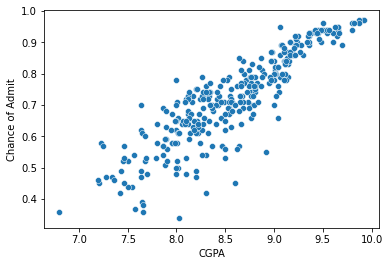

In [264]:
## TODO
sns.scatterplot(x='CGPA',y=y_train, data=df_dum)

#### 3.1.5. 범주형 설명변수와 종속변수의 관계를 box plot으로 그려 보세요.

<AxesSubplot:xlabel='Research', ylabel='Chance of Admit'>

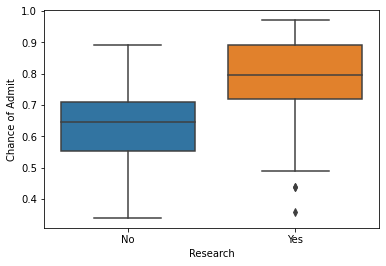

In [265]:
## TODO
sns.boxplot(x='Research', y=y_train, data=df)

### 3.2. StatsModels로 선형 회귀 시행하기

In [266]:
import statsmodels.api as sm

In [267]:
## TODO
model=sm.OLS(y_train,X_train)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance of Admit   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     211.6
Date:                Wed, 28 Jul 2021   Prob (F-statistic):          1.99e-114
Time:                        02:41:40   Log-Likelihood:                 449.18
No. Observations:                 320   AIC:                            -882.4
Df Residuals:                     312   BIC:                            -852.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
GRE Score             0.0016      0.001      2.571      0.011       0.000       0.003
TOEFL Score           0.0036      0.001      3.161      0.002       0.001       0.006
University Rating     0.0027      0.005      0.582      0.561      -0.007       0.012
SOP                   0.0073      0.006      1.273      0.204      -0.004       0.018
LOR                   0.0173      0.005      3.391      0.001       0.007       0.027
CGPA                  0.1121      0.012      9.237      0.000       0.088       0.136
Research_No          -1.2552      0.132     -9.498      0.000      -1.515      -0.995
Research_Yes         -1.2287      0.136     -9.065      0.000      -1.495      -0.962
==============================================================================
Omnibus:                       72.061   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.598
Skew:                          -1.110   Prob(JB):                     2.99e-36
Kurtosis:                       5.710   Cond. No.                     1.88e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Q. R^2와 F-statistic을 고려해 볼 때, 이 모델은 좋은 모델이라고 볼 수 있나요?  
A. R^2과 Adj-R^2의 값의 차이가 크지 않고, F통계량이 211.6으로 매우 큰 값을 갖고 있으므로 해당 모델이 적절한 개수의 독립변수를 가졌으며 유의미한 모델임을 알 수 있다.

Q. 계수에 대한 가설 검정 결과를 바탕으로 'University Rating'이 대학원 합격률에 미치는 영향을 어떻게 해석할 수 있을까요?  
A. 'University Rating'은 P-value가 0.05보다 작으므로 대학원 합격률에 유의미한 영향을 끼치지 않음을 알 수 있다.

# 4. Ridge, Lasso 회귀

이번에는 scikit-learn으로 Ridge와 Lasso를 시도해 보세요.  
**가장 적절한 수준의 alpha를 찾아 모델에 적용해 보세요.**  
(힌트: cross-validation을 사용하세요.)  
(참고자료:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html  
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html)

In [268]:
from sklearn.linear_model import RidgeCV

# 1. 먼저 모델을 만들어 줍니다.
## TODO
alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1, 10]
ridge_cv=RidgeCV(alphas=alphas, cv=10)

# 2. 모델을 적합시킵니다.
## TODO
model1 = ridge_cv.fit(X_train, y_train)
print('Optimal alpha =',model1.alpha_)

# 3. train 세트와 test 세트에서의 성능을 확인합니다. (이 경우 결정계수 R^2)
## TODO
print("Training R^2_score = %.4f" % ridge_cv.score(X_train, y_train))
print("Testing R^2_score = %.4f"% ridge_cv.score(X_test, y_test))

Optimal alpha = 1.0
Training R^2_score = 0.8259
Testing R^2_score = 0.7711


In [269]:
from sklearn.linear_model import LassoCV

# 1. 먼저 모델을 만들어 줍니다.
## TODO
lasso_cv = LassoCV(alphas=alphas, cv=10)
# 2. 모델을 적합시킵니다.
## TODO
model2 = lasso_cv.fit(X_train, y_train)
print('Optimal alpha =',model2.alpha_)

# 3. train 세트와 test 세트에서의 성능을 확인합니다. (이 경우 결정계수 R^2)
## TODO
print("Training R^2_score = %.4f" % lasso_cv.score(X_train, y_train))
print("Testing R^2_score = %.4f"% lasso_cv.score(X_test, y_test))

Optimal alpha = 0.0001
Training R^2_score = 0.8260
Testing R^2_score = 0.7727


In [270]:
Final_result = pd.DataFrame(linear.predict(test_dum), columns=['Chance of Admit'])
Final_result.to_csv('graduate_submission.csv')                                

**X_test, df_dum이 아닌 test_dum으로 받아와야 하는거 실수 주의!**